In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/kukuroo3/student-performance-data-set-competition-form

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0}) 

<Axes: >

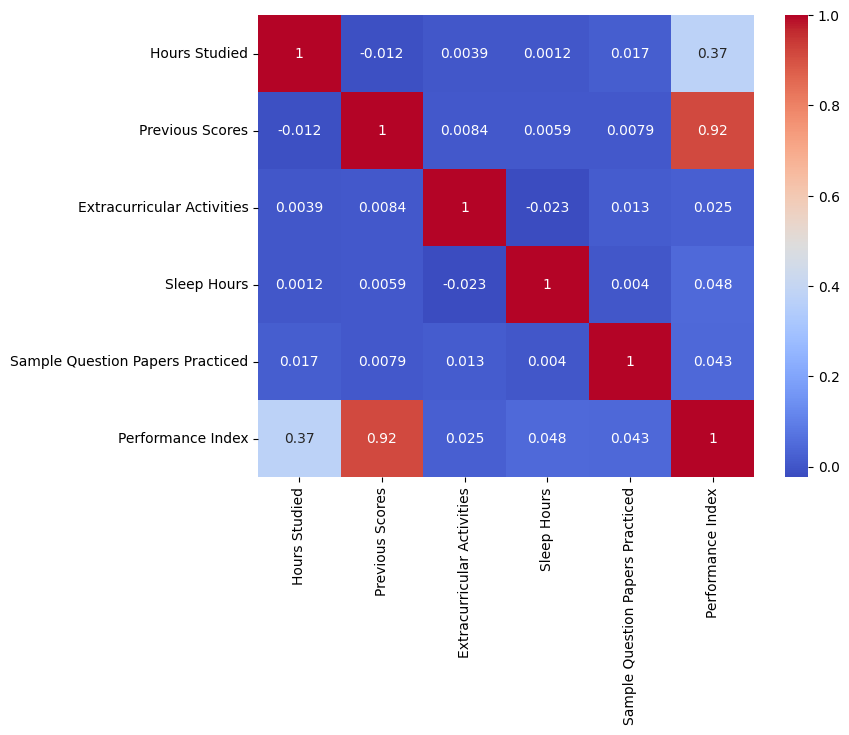

In [5]:
correlation_matrix = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [ ]:
# highly_correlated_features = correlation_matrix['price'][
#     (correlation_matrix['price'].abs() > 0.5) & 
#     (correlation_matrix['price'] != 1)
# ].index.tolist()

In [6]:
x = df.drop('Performance Index',axis = 1)                                                     
y = df['Performance Index']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [31]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [7]:
scale = StandardScaler()
x_train_sc = scale.fit_transform(X_train)
x_test_sc = scale.transform(X_test)

In [8]:
model = LinearRegression()
model.fit(x_train_sc,y_train)

LinearRegression()

In [9]:
y_train_pred = model.predict(x_train_sc)
y_test_pred = model.predict(x_test_sc)

Evaluate

In [10]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print(f' R2 Train = {r2_train:.2f} R2 TEST = {r2_test:.2f}')

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f' MSE Train = {mse_train:.2f} MSE TEST = {mse_test:.2f}')

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f' MSE Train = {rmse_train:.2f} MSE TEST = {rmse_test:.2f}')

 R2 Train = 0.99 R2 TEST = 0.99
 MSE Train = 4.17 MSE TEST = 4.08
 MSE Train = 2.04 MSE TEST = 2.02


Prediction

In [12]:
x_q1 = [[3,66,1,8,2]]
x_q2 = [[9,80,0,7,3]]

x_q1_sc = scale.transform(x_q1)
x_q2_sc = scale.transform(x_q2)

c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
y_q1 = model.predict(x_q1_sc)
y_q2 = model.predict(x_q2_sc)

In [14]:
y_q1

array([46.56453814])

C:\Users\User\AppData\Local\Temp\ipykernel_55932\2326394082.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2,c='w')


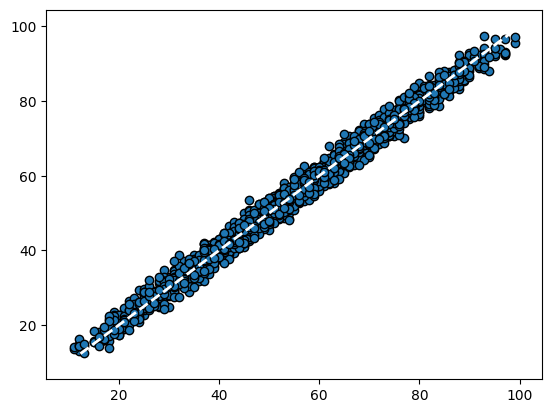

In [15]:
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2,c='w')


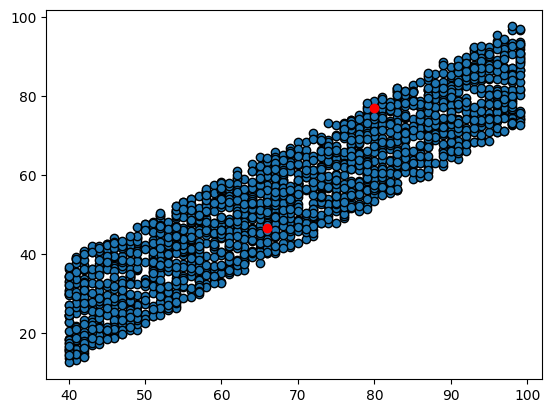

In [16]:
plt.scatter(X_test['Previous Scores'], y_test_pred, edgecolors=(0, 0, 0))
plt.plot(66,y_q1,'ro')
plt.plot(80,y_q2,'ro')